# This is a Supervised machine learning model for predicting a score of a student based on the number of hours he/she studies

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


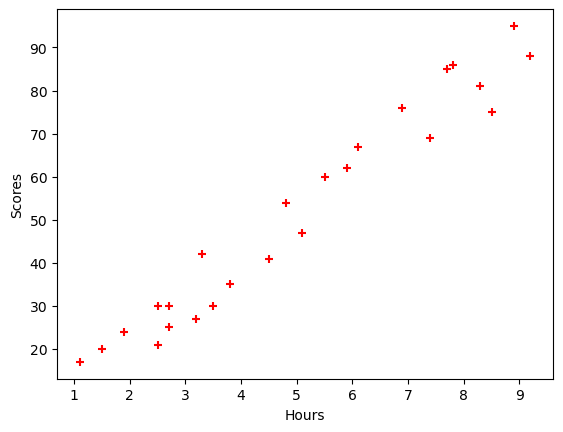

In [4]:
#The %matplotlib inline command is a magic command in Jupyter notebooks that allows the resulting plots or visualizations to be displayed directly below the code cell that generated them. It is used to enable the inline plotting mode for Matplotlib in Jupyter environments.

%matplotlib inline
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(df.Hours,df.Scores,color='red',marker='+')

In [5]:
X = df.drop('Scores',axis='columns')
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [6]:
Y = df.Scores
Y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [7]:
reg = linear_model.LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [8]:
reg.predict([[9.25]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92.90985477])

In [9]:
reg.coef_

array([9.77580339])

In [10]:
reg.intercept_

2.48367340537321

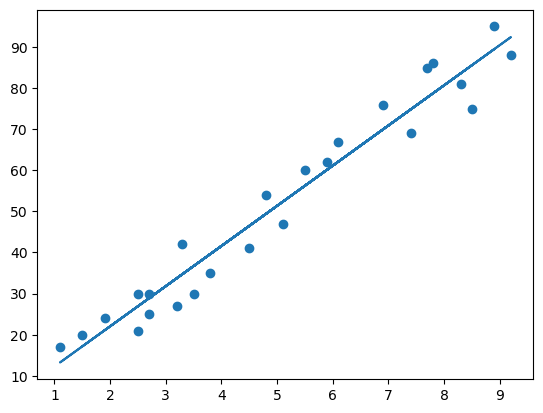

In [11]:
line = reg.coef_*X + reg.intercept_

plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

# Now solving by test,train and split method and see the difference

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,)

In [13]:
X_train

,Hours
5,1.5
15,8.9
24,7.8
6,9.2
22,3.8
18,6.1
13,3.3
20,2.7
10,7.7
14,1.1


In [14]:
X_test

,Hours
2,3.2
1,5.1
23,6.9
7,5.5
0,2.5


In [15]:
Y_train

5     20
15    95
24    86
6     88
22    35
18    67
13    42
20    30
10    85
14    17
4     30
12    41
8     81
19    69
3     75
9     25
21    54
11    62
16    30
17    24
Name: Scores, dtype: int64

In [16]:
Y_test

2     27
1     47
23    76
7     60
0     21
Name: Scores, dtype: int64

In [17]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, Y_train)

LinearRegression()

In [18]:
clf.predict(X_test)

array([34.73324035, 52.75258068, 69.82353468, 56.54612602, 28.09453601])

In [19]:
Y_test

2     27
1     47
23    76
7     60
0     21
Name: Scores, dtype: int64

In [20]:
clf.score(X_test,Y_test)

0.9071895518738236

In [23]:
clf.predict([[9.25]])


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92.11061352])